<a href="https://colab.research.google.com/github/Harishpatil0172/Stock_Market-/blob/main/01_Stock_Prediction(Maruti_Suzuki).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # For plotting graphs
from datetime import datetime    # To access datetime 
import plotly.express as px
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely import wkt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

import statsmodels.api as sm 
import matplotlib.dates as mdates # For plotting graphs 
import datetime as dt
from pandas import Series        # To work on series 
sns.set(rc={'figure.figsize':(11, 4)})
%matplotlib inline 

import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")

# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

In [42]:
df = pd.read_csv("/content/drive/MyDrive/Stock Market/Stock data/MARUTI.csv")
df.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.0,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.3,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.0,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568


In [43]:
# For the sake of this notebook, limit the number of columns to keep things simple. 

data = df[['Date','Open','High','Low','Close','Volume','VWAP']]
data.head(3)

,Date,Open,High,Low,Close,Volume,VWAP
0,2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
1,2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2,2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45


### Datetime objects in Python

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4427 non-null   object 
 1   Open    4427 non-null   float64
 2   High    4427 non-null   float64
 3   Low     4427 non-null   float64
 4   Close   4427 non-null   float64
 5   Volume  4427 non-null   int64  
 6   VWAP    4427 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 242.2+ KB


In [45]:
# Convert string to datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Volume,VWAP
Date,,,,,,
2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


### About the Stock Data
Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.


* The Open and Close columns indicate the opening and closing price of the stocks on a particular day.
* The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.
* The Volume column tells us the total volume of stocks traded on a particular day.
* The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security.source.

#### Visualising the Time Series data

Text(0, 0.5, 'VWAP')

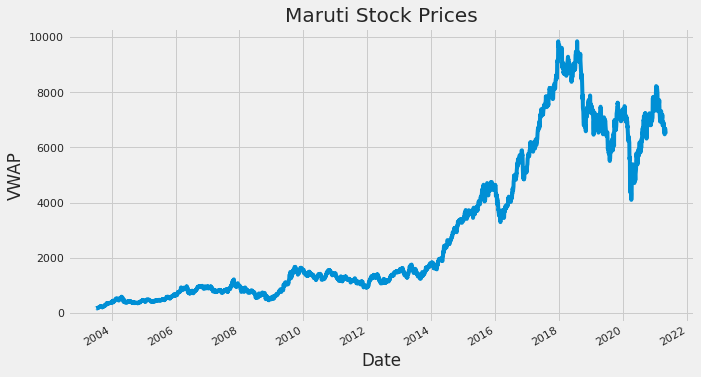

In [46]:
data['VWAP'].plot(figsize=(10,6),title='Maruti Stock Prices')
plt.ylabel('VWAP')

In [47]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [48]:
test_date = datetime(my_year, my_month, my_day)
test_date

datetime.datetime(2019, 4, 21, 0, 0)

In [49]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


In [50]:
print(data.index.max())
print(data.index.min())

2021-04-30 00:00:00
2003-07-09 00:00:00


In [51]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  4426


In [52]:
df_vwap = df[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index("Date", inplace = True)
df_vwap.head()

,VWAP
Date,
2003-07-09,165.95
2003-07-10,166.74
2003-07-11,172.45
2003-07-14,177.91
2003-07-15,176.88


In [53]:
# Slicing on year
vwap_subset = df_vwap['2017':'2020']

# Slicing on month
vwap_subset = df_vwap['2017-01':'2020-12']

#Slicing on day
vwap_subset = df_vwap['2017-01-01':'2020-12-15']

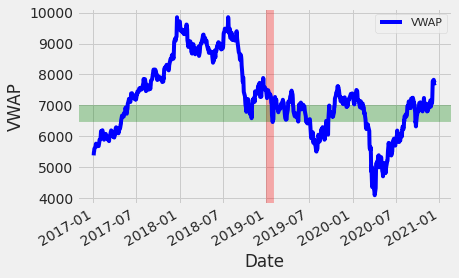

In [54]:
ax = vwap_subset.plot(color='blue',fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('VWAP')

ax.axvspan('2019-01-01','2019-01-31', color='red', alpha=0.3)
ax.axhspan(6500,7000, color='green',alpha=0.3)

plt.show()

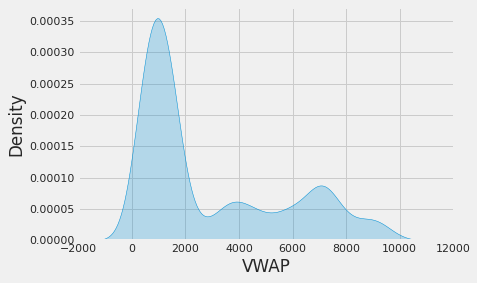

In [55]:
sns.kdeplot(df_vwap['VWAP'],shade=True)

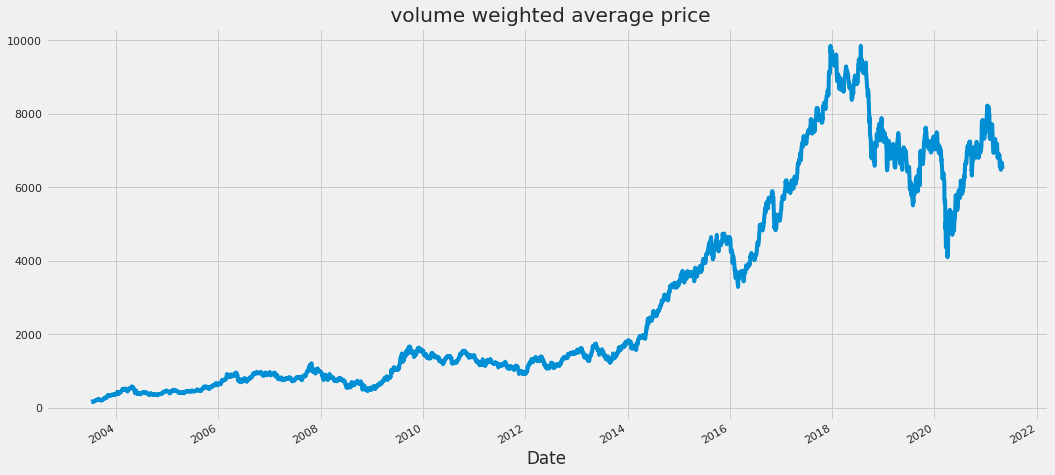

In [56]:
# Visualising the VWAP 
df_vwap['VWAP'].plot(figsize=(16,8),title=' volume weighted average price')

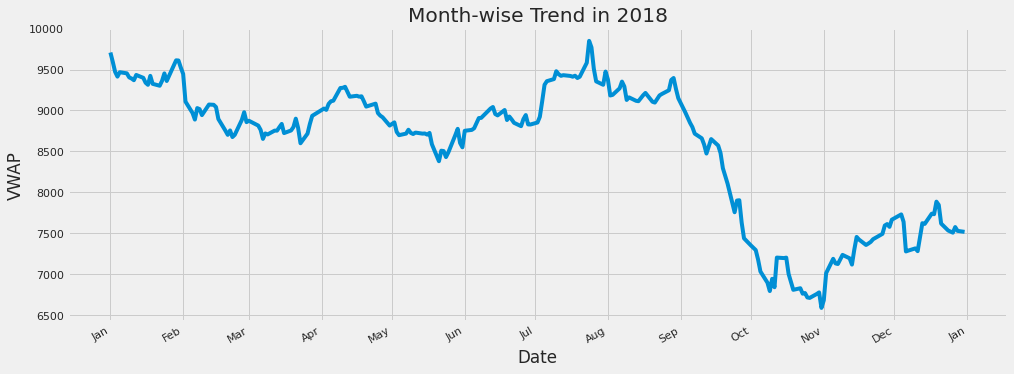

In [57]:
ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2018'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

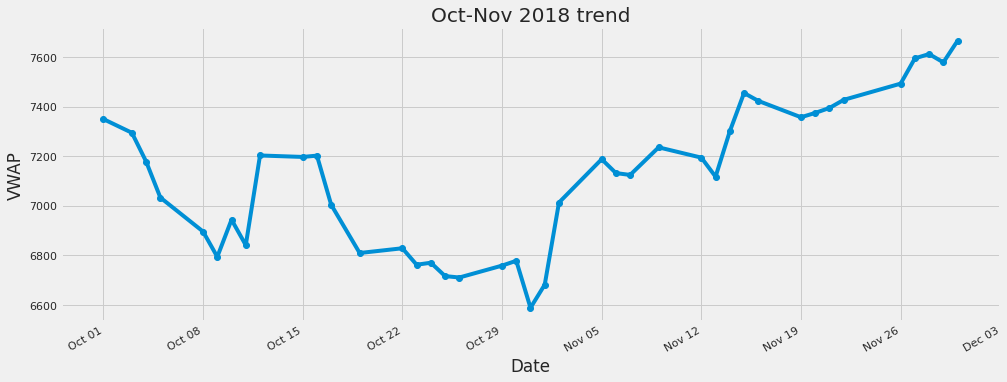

In [58]:
ax = df_vwap.loc['2018-10':'2018-11','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Oct-Nov 2018 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### Time-series seasonal decomposition

We can decompose a time series into trend, seasonal amd remainder components, as mentioned in the earlier section. The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels is used to implements the decomposition.

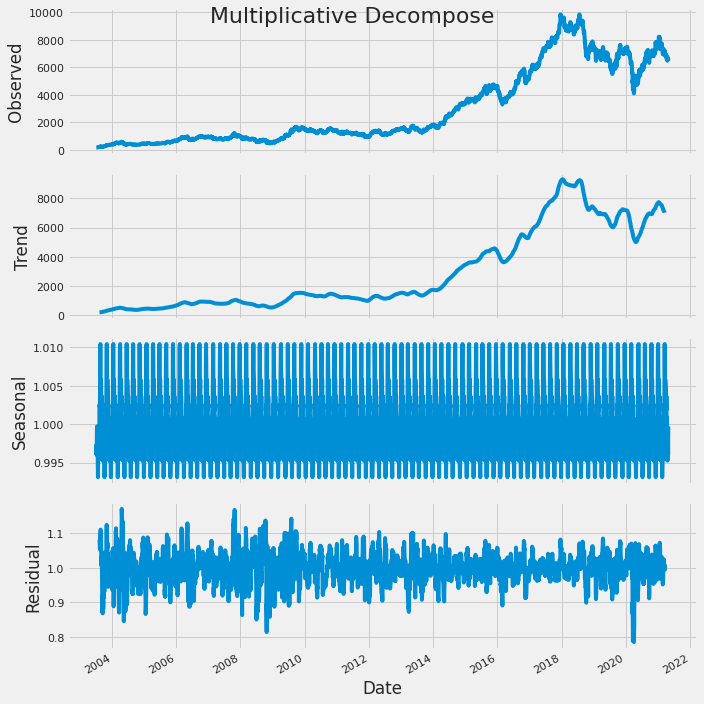

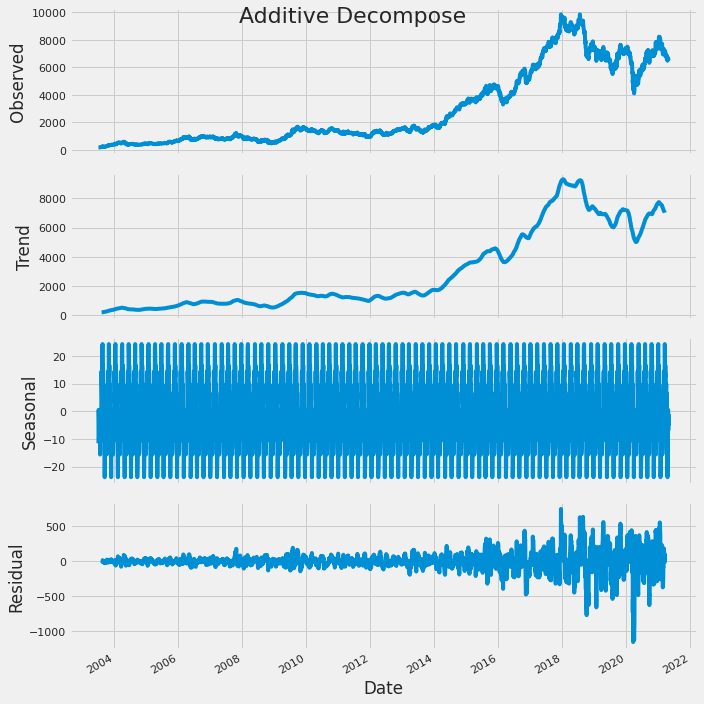

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


plt.rcParams.update({'figure.figsize': (10,10)})
y = df_vwap['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',freq = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',freq = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [60]:
## Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.tail()

,seas,trend,resid,actual_values
Date,,,,
2021-04-26,0.503451,NaN,NaN,6678.34
2021-04-27,-3.642451,NaN,NaN,6620.68
2021-04-28,-6.863076,NaN,NaN,6598.62
2021-04-29,-1.133388,NaN,NaN,6580.77
2021-04-30,-5.270093,NaN,NaN,6500.51


### Feature Extraction

In [61]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek
# df_vwap['Weekday Name'] = df_vwap.Date.dt.weekday_name
df_vwap['Weekday'] = df_vwap['Date'].dt.strftime("%A")

#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week,Weekday
Date,,,,,,
2003-07-09,165.95,2003,7,9,2,Wednesday
2003-07-10,166.74,2003,7,10,3,Thursday
2003-07-11,172.45,2003,7,11,4,Friday
2003-07-14,177.91,2003,7,14,0,Monday
2003-07-15,176.88,2003,7,15,1,Tuesday


### Time resampling

* Examining stock price data for every single day isn’t of much use to financial institutions, who are more interested in spotting market trends. To make it easier, we use a process called time resampling to aggregate data into a defined time period, such as by month or by quarter. Institutions can then see an overview of stock prices and make decisions according to these trends.

* The pandas library has a resample() function which resamples such time series data. The resample method in pandas is similar to its groupby method as it is essentially grouping according to a certain time span. The resample() function looks like this:

In [62]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2003-12-31,266.608468,2003.0,9.604839,16.298387,2.016129
2004-12-31,430.522835,2004.0,6.559055,15.708661,2.047244
2005-12-31,494.328566,2005.0,6.541833,15.733068,2.000000
2006-12-31,845.582160,2006.0,6.552000,15.976000,2.056000
2007-12-31,887.107871,2007.0,6.554217,15.843373,1.987952


 To summarize what happened above:

---



data.resample() is used to resample the stock data.
The ‘A’ stands for year-end frequency, and denotes the offset values by which we want to resample the data.
mean() indicates that we want the average stock price during this period.

Text(0.5, 1.0, 'Yearly Mean VWAP for Maruti')

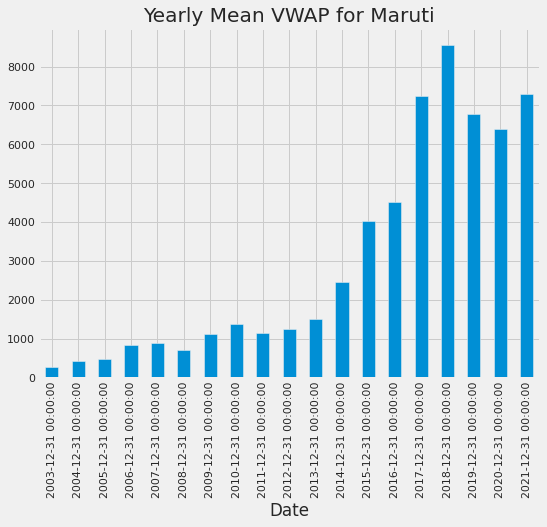

In [63]:
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Maruti')

The above bar plot corresponds to Maruti’s VWAP at year-end for each year in our data set.

Similarly, year start mean VWAP can be found below.

Text(0.5, 1.0, 'Yearly start Mean VWAP for Maruti')

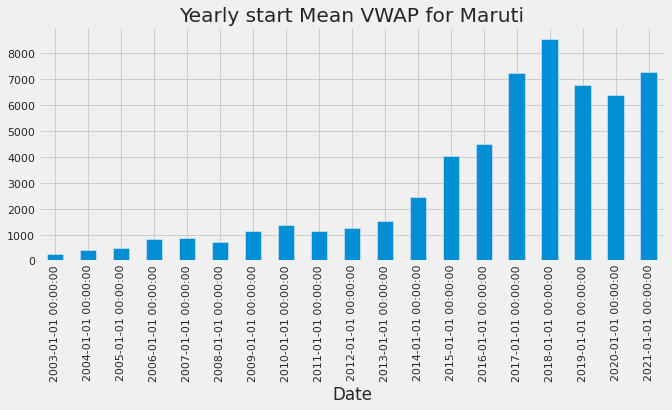

In [64]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for Maruti')

### Time Shifting

Sometimes, we may need to shift or move the data forward or backwards in time. This shifting is done along a time index by the desired number of time-frequency increments.Here is the original dataset before any time shifts.

In [65]:
df_vwap.head(5)

,VWAP,year,month,day,day of week,Weekday
Date,,,,,,
2003-07-09,165.95,2003,7,9,2,Wednesday
2003-07-10,166.74,2003,7,10,3,Thursday
2003-07-11,172.45,2003,7,11,4,Friday
2003-07-14,177.91,2003,7,14,0,Monday
2003-07-15,176.88,2003,7,15,1,Tuesday


### Forward Shifting


To shift our data forward, we will pass the desired number of periods (or increments) through the shift() function, which needs to be positive value in this case. Let's move our data forward by one period or index, which means that all values which earlier corresponded to row N will now belong to row N+1. Here is the output:

In [66]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week,Weekday
Date,,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-10,165.95,2003.0,7.0,9.0,2.0,Wednesday
2003-07-11,166.74,2003.0,7.0,10.0,3.0,Thursday
2003-07-14,172.45,2003.0,7.0,11.0,4.0,Friday
2003-07-15,177.91,2003.0,7.0,14.0,0.0,Monday


### Backwards Shifting


To shift our data backwards, the number of periods (or increments) must be negative.

In [68]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week,Weekday
Date,,,,,,
2003-07-09,166.74,2003.0,7.0,10.0,3.0,Thursday
2003-07-10,172.45,2003.0,7.0,11.0,4.0,Friday
2003-07-11,177.91,2003.0,7.0,14.0,0.0,Monday
2003-07-14,176.88,2003.0,7.0,15.0,1.0,Tuesday
2003-07-15,177.59,2003.0,7.0,16.0,2.0,Wednesday


The opening amount corresponding to 2003-07-09 is now 167, whereas originally it was 164.90.

### Shifting based off time string code


We can also use the offset from the offset table for time shifting. For that, we will use the pandas shift() function. We only need to pass in the periods and freq parameters. The period attribute defines the number of steps to be shifted, while the freq parameters denote the size of those steps.

Let’s say we want to shift the data three months forward:

In [69]:
df_vwap.tshift(periods=3, freq = 'M').head()

,VWAP,year,month,day,day of week,Weekday
Date,,,,,,
2003-09-30,165.95,2003,7,9,2,Wednesday
2003-09-30,166.74,2003,7,10,3,Thursday
2003-09-30,172.45,2003,7,11,4,Friday
2003-09-30,177.91,2003,7,14,0,Monday
2003-09-30,176.88,2003,7,15,1,Tuesday


### Rolling windows


Time series data can be noisy due to high fluctuations in the market. As a result, it becomes difficult to gauge a trend or pattern in the data. Here is a visualization of the Amazon’s adjusted close price over the years where we can see such noise:

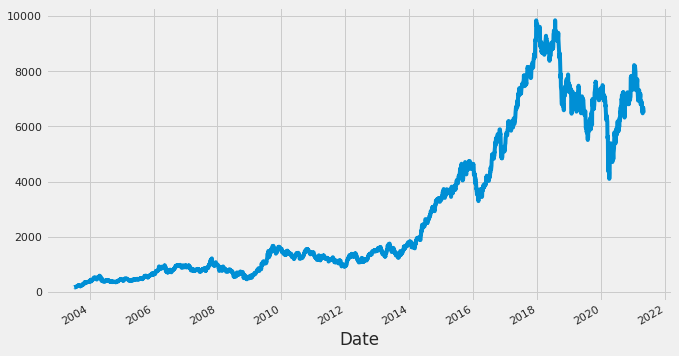

In [70]:
df_vwap['VWAP'].plot(figsize = (10,6))

As we’re looking at daily data, there’s quite a bit of noise present. It would be nice if we could average this out by a week, which is where a rolling mean comes in. A rolling mean, or moving average, is a transformation method which helps average out noise from data. It works by simply splitting and aggregating the data into windows according to function, such as mean(), median(), count(), etc. For this example, we’ll use a rolling mean for 7 days.

In [71]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,NaN,NaN,NaN,NaN,NaN
2003-07-11,NaN,NaN,NaN,NaN,NaN
2003-07-14,NaN,NaN,NaN,NaN,NaN
2003-07-15,NaN,NaN,NaN,NaN,NaN
2003-07-16,NaN,NaN,NaN,NaN,NaN
2003-07-17,173.285714,2003.0,7.0,13.142857,2.142857
2003-07-18,173.530000,2003.0,7.0,14.428571,2.428571
2003-07-21,173.520000,2003.0,7.0,16.000000,2.000000


The first six values have all become blank as there wasn’t enough data to actually fill them when using a window of seven days.

So, what are the key benefits of calculating a moving average or using this rolling mean method? Our data becomes a lot less noisy and more reflective of the trend than the data itself. Let’s actually plot this out. First, we’ll plot the original data followed by the rolling data for 30 days.

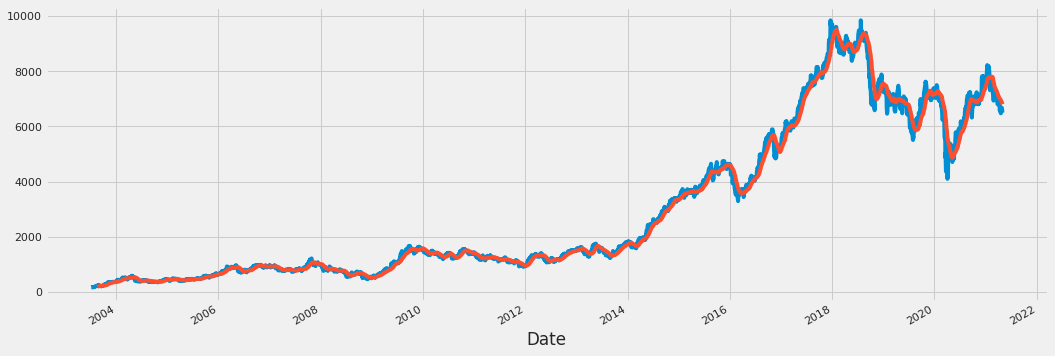

In [72]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))

The blue line is the original open price data. The red line represents the 30-day rolling window, and has less noise than the orange line. Something to keep in mind is that once we run this code, the first 29 days aren’t going to have the blue line because there wasn’t enough data to actually calculate that rolling mean.

### Handling Missing Values in Time-series Data


Real world data is messy and often contains missing values. it is not uncommon for time-series data to contain missing values.

In [75]:
#Checking for missing values
df_vwap.isnull().sum()

VWAP           0
year           0
month          0
day            0
day of week    0
Weekday        0
dtype: int64

Our current data doesn't have any missing values but then this doesn't reflect so of the scenarios we might face in real life. I have created an extensive notebook that goes deeper into handling missing values in both Time series and non Time series problems.

In [76]:
# reference = https://www.kaggle.com/code/parulpandey/getting-started-with-time-series-using-pandas/notebook